Assignment 2

NIHAR MUNIRAJU

STUDENT ID: 2072857

QUESTION 1:
PART A

A]  [5 pts] Load the data sets, including the train and test matrices as well as the train and test labels. Show the top 20 terms in the decreasing order of total training frequency (total number of occurences of the term across all documents in the training data). Then plot the distribtution of term frequencies in the training data (using a line plot similar to class examples).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestCentroid

In [2]:
# Load the term-document matrices
terms = pd.read_csv('N:/Programming machine learning/Assignment 2/newsgroups/modifiedterms.txt', header=None, sep='\t')
train_matrix = pd.read_csv('N:/Programming machine learning/Assignment 2/newsgroups/trainMatrixModified.txt', header=None, sep='\t')
test_matrix = pd.read_csv('N:/Programming machine learning/Assignment 2/newsgroups/testMatrixModified.txt', header=None, sep='\t')
train_classes = pd.read_csv('N:/Programming machine learning/Assignment 2/newsgroups/trainClasses.txt', header=None, sep='\t', index_col=0)
test_classes = pd.read_csv('N:/Programming machine learning/Assignment 2/newsgroups/testClasses.txt', header=None, sep='\t', index_col=0)

In [3]:
# Calculate total term frequencies in the training data
total_term_frequencies = train_matrix.sum(axis=0)
print(total_term_frequencies)

0      196.0
1       79.0
2       51.0
3       39.0
4       33.0
       ...  
795     31.0
796     43.0
797     88.0
798      2.0
799    101.0
Length: 800, dtype: float64


In [4]:
# shape of labels
len(train_classes), len(test_classes), len(terms), train_matrix.shape, test_matrix.shape

(800, 200, 5500, (5500, 800), (5500, 200))

In [5]:
total_term_frequencies = train_matrix.sum(axis=1)

In [6]:
# Sort frequencies in descending order and select the top 20
top_20_terms = total_term_frequencies.sort_values(ascending=False).head(20)
print("Top 20 terms by frequency:", top_20_terms)

Top 20 terms by frequency: 3       959.0
225     720.0
136     680.0
1682    578.0
115     545.0
30      483.0
107     470.0
84      429.0
192     401.0
82      378.0
690     370.0
25      329.0
45      326.0
36      325.0
451     323.0
187     319.0
9       318.0
640     311.0
184     302.0
106     300.0
dtype: float64


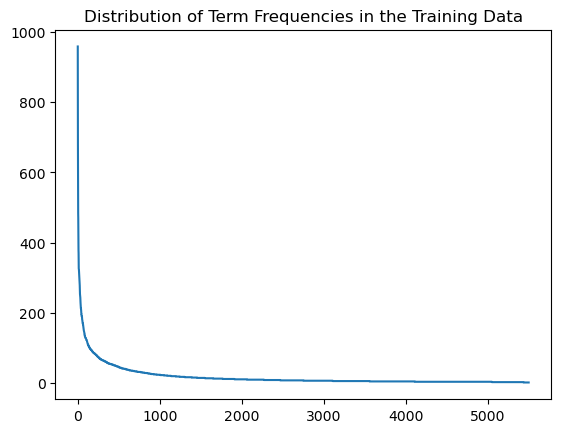

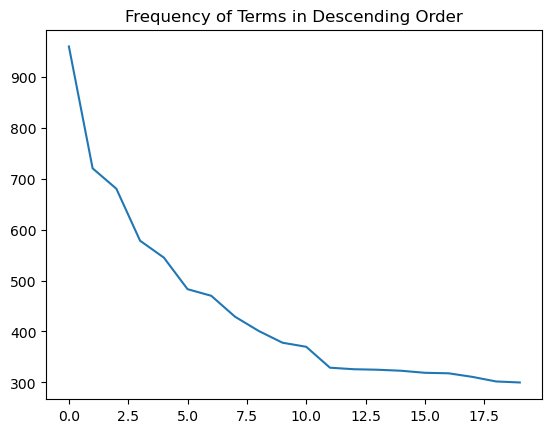

In [7]:
plt.plot(sorted(total_term_frequencies, reverse=True))
plt.title("Distribution of Term Frequencies in the Training Data")
plt.show()

plt.plot(sorted(top_20_terms, reverse=True))
plt.title("Frequency of Terms in Descending Order")
plt.show()

PART B [10 pts] Create your own K-Nearest-Neighbor classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K (number of neighbors), and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples). Show that your classifier works by running it on the first two instances in the test data using both Cosine and Euclidean distance in each case.

In [8]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [9]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    print("Labels for top ", K, "neighbors: ", count.most_common())
    return count.most_common(1)[0][0]

In [10]:
#Transpose training/test matrix
train_matrixT = train_matrix.T
test_matrixT = test_matrix.T

In [11]:
#convert trainMatrixT to np array for search function, get test instances
trainArray = np.array(train_matrixT)
x = np.array(test_matrixT.iloc[1])
y = np.array(test_matrixT.iloc[2])
x.shape, trainArray.shape

((5500,), (800, 5500))

In [12]:
#knn search test
n, dist = knn_search(y, trainArray, 5, 1)

dist = pd.Series(dist)
dist.sort_values()

453    0.712351
688    0.750415
519    0.750870
177    0.794804
486    0.821767
         ...   
149    0.992854
330    0.993175
18     0.993264
555    0.994516
122    0.995560
Length: 800, dtype: float64

In [13]:
train_classes.columns = range(1)
type(train_classes[0])

pandas.core.series.Series

In [14]:
#knn classifcation test - Euclidean, First Test Instance
testing1 = knn_classify(x, trainArray, 5, train_classes[0], 0)

Labels for top  5 neighbors:  [(0, 3), (1, 2)]


In [15]:
#knn classifcation test - Cosine Similarity, First Test Instance
testing2 = knn_classify(x, trainArray, 5, train_classes[0], 1)

Labels for top  5 neighbors:  [(0, 5)]


In [16]:
testing12 = knn_classify(y, trainArray, 5, train_classes[0], 0)
testing12

Labels for top  5 neighbors:  [(0, 3), (1, 2)]


0

In [17]:
#knn classifcation test - Cosine Similarity, Second Test Instance
testing22 = knn_classify(y, trainArray, 5, train_classes[0], 1)
testing22

Labels for top  5 neighbors:  [(0, 5)]


0

PART C [10 pts] Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances) [See class notes: Classification & Prediction - Review of Basic Concepts].

In [18]:
#new evaluate function
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    # print("Labels for top ", K, "neighbors: ", count.most_common())
    predicted_label = count.most_common(1)[0][0]
    return neigh_idx, predicted_label


In [19]:

def knn_evaluate(test, test_classes, train, train_classes, K, measure):
    T = 0
    F = 0
    for i in range(len(test)):
        actual = test_classes[i]
        top_K_neighbors, predicted = knn_classify(test[i], train, K, train_classes, measure)
        if actual == predicted:
            T += 1
        else:
            F += 1
    accuracy = float(T) / float(T + F)
    return accuracy

In [20]:
testMatrixT = test_matrix.T
testArray = np.array(testMatrixT)
testArray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
classification_accuracy_k = knn_evaluate(testArray, test_classes.iloc[:, 0] , trainArray, train_classes.iloc[:, 0], 5, 0)
print(f"Classification accuracy for k=5: ", classification_accuracy_k)

Classification accuracy for k=5:  0.815


PART D [10 pts] Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Euclidean distance version vs. cosine similarity version).

Creating Euclid accuracy list based on different values of K

In [22]:
testMatrixTA = testArray
testClassSeriesA = test_classes.iloc[:, 0]
trainMatrixTA = trainArray
trainClassSeriesA = train_classes.iloc[:, 0]

Euclid=[]
for K in range(5, 105, 5):
    Euclid.append(knn_evaluate(testMatrixTA, testClassSeriesA, trainMatrixTA, trainClassSeriesA, K, 0))
print(Euclid)

[0.815, 0.85, 0.785, 0.765, 0.73, 0.725, 0.69, 0.7, 0.655, 0.67, 0.655, 0.66, 0.625, 0.625, 0.63, 0.615, 0.615, 0.61, 0.605, 0.605]


Creating Cosine accuracy list based on different values of K

In [23]:
Cosine=[]
for K in range(5, 105, 5):
    Cosine.append(knn_evaluate(testMatrixTA, testClassSeriesA, trainMatrixTA, trainClassSeriesA, K, 1))
print(Cosine)

[0.97, 0.985, 0.985, 0.975, 0.97, 0.98, 0.98, 0.98, 0.975, 0.98, 0.975, 0.98, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975]


Text(0.5, 1.0, 'Classification accuracy over range of k values')

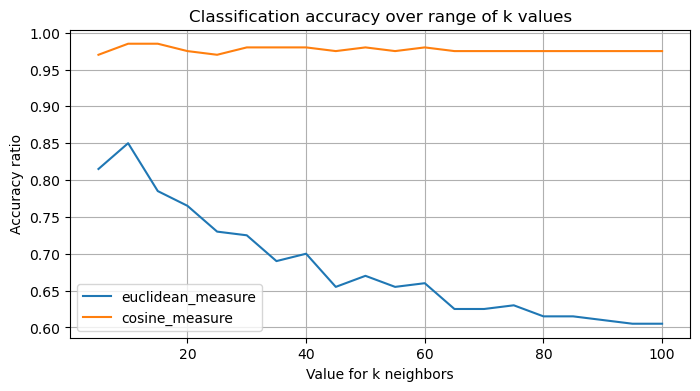

In [24]:
plt.figure(figsize=(8, 4))
plt.plot(range(5, 101, 5), Euclid, label='euclidean_measure')
plt.plot(range(5, 101, 5), Cosine, label='cosine_measure')
plt.legend()
plt.grid()
plt.xlabel("Value for k neighbors")
plt.ylabel("Accuracy ratio")
plt.title("Classification accuracy over range of k values")

PART E [10 pts] Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation (only for the Cosine similarity version of the classifier) on the range of K values (as above) and create a chart comparing the results with and without using TFxIDF weights.

In [25]:
# we will use standard sklearn methods for tfidf
numTerms=train_matrix.shape[0]
NDocs = train_matrix.shape[1]
TD = train_matrix
print(NDocs)
print(numTerms)

800
5500


Convert Training Matrix and Test Matrix to TFxIDF weights

In [26]:

DF = pd.DataFrame([(TD!=0).sum(1)]).T
NMatrix = np.ones(np.shape(TD), dtype = float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [27]:
IDF = np.log2(np.divide(NMatrix, np.array(DF)))
IDF


array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [6.84, 6.84, 6.84, ..., 6.84, 6.84, 6.84],
       [6.32, 6.32, 6.32, ..., 6.32, 6.32, 6.32],
       ...,
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64]])


Training Matrix IDF weights - values are all the same columns of array

In [28]:
TD_tfidf = TD * IDF
pd.set_option("display.precision",2)
TD_tfidf

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5496,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5497,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5498,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [29]:
IDFt = IDF[:,:200]
test_matrix_tfidf = test_matrix * IDFt
test_matrix_tfidf


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
TD_tfidf_TA = np.array(TD_tfidf.T)
test_matrix_tfidTA = np.array(test_matrix_tfidf.T)
CosineIDF=[]
for K in range(5, 105, 5):
    CosineIDF.append(knn_evaluate(test_matrix_tfidTA, testClassSeriesA, TD_tfidf_TA, trainClassSeriesA, K, 1))
print(CosineIDF)


[0.98, 0.99, 0.99, 1.0, 0.995, 0.995, 0.99, 0.995, 0.995, 0.99, 0.995, 0.995, 0.99, 0.995, 0.995, 0.995, 0.99, 0.99, 0.985, 0.985]


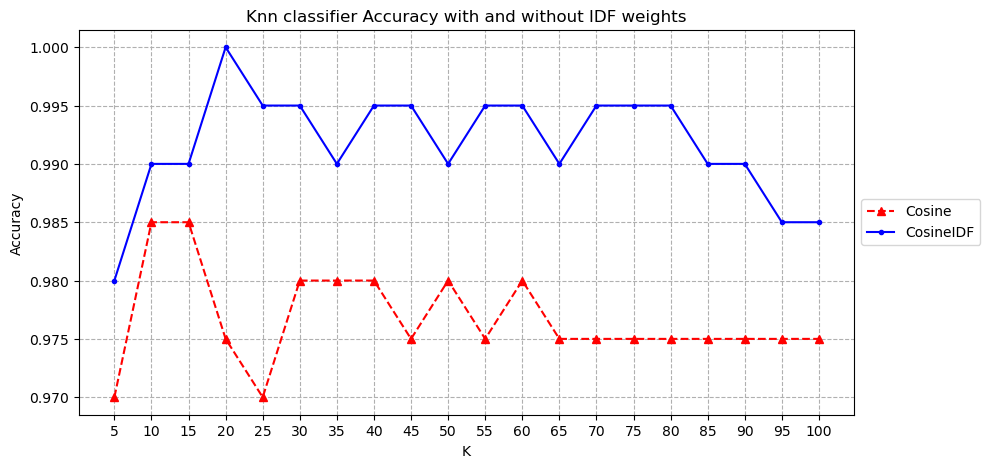

In [31]:
Ks=list(range(5, 105, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, Cosine, 'r^--', label='Cosine')
plt.plot(Ks, CosineIDF, 'b.-', label='CosineIDF')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy with and without IDF weights')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

PART F [10 pts] Create a new classifier based on the Rocchio Method (also know as the "nearest centroid" method) adapted for text categorization [See class notes on Text Categorization]. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  Finally, use your evaluation function to compare your results to the best KNN results you obtained in part d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario. The number of classes should not be hardcoded in your implementation.]
 


In [32]:
from numpy import dot
from numpy.linalg import norm

In [33]:
def rocchioTrain(trainMat, trainLab):
    '''takes in training matrix and labels and returns prototype vector for each class in a dict'''
    d = {}
    for i in range(len(trainLab)):
        if trainLab[i] not in d.keys():
            d[trainLab[i]] = trainMat[i]
        else:
            d[trainLab[i]] += trainMat[i]
    return d

In [34]:
#transpose, create np array
DT_tfidf = TD_tfidf.T
DT_tfidfArray = np.array(DT_tfidf)

In [35]:
d = rocchioTrain(DT_tfidfArray, train_classes[0])
d

{0: array([228.  ,  27.35,  31.61, ...,   8.64,  17.29,  17.29]),
 1: array([180.  ,  47.86, 107.47, ...,   8.64,   0.  ,   0.  ])}

In [36]:
def rocchioClassify(x, trainMat, trainLab):

    d = rocchioTrain(trainMat, trainLab)
    sims = []
    cls = 0
    D_norm = np.array([np.linalg.norm(d[i]) for i in range(len(d))])
    x_norm = np.linalg.norm(x)
    #For each prototype, compute and record a similarity score
    for i in range(len(d)):
        sims.append([np.dot(d[i],x)/(D_norm[i] * x_norm)])
    #Find the index/class with the highest similarity score
    for i in range(len(sims)):
        if sims[cls] < sims[i]:
            cls = i
    return sims, cls


In [37]:
rocchioClassify(x, DT_tfidfArray, train_classes[0])

([[0.24351132162366843], [0.06898620074362669]], 0)

In [38]:
def rocchioEvaluate(test, test_labs, train, train_labs):
    T = 0
    F = 0
    for i in range(len(test)):
        actual = test_labs[i]
        similarities, predicted = rocchioClassify(test[i], train, train_labs)
        if actual == predicted:
            T += 1
        else:
            F += 1
    accuracy = float(T) / float(T + F)
    return accuracy

In [39]:
print(train_classes.shape)
print(test_classes.shape)


(800, 1)
(200, 1)


In [40]:
# Convert the single-column DataFrame to a Series
train_labels_series = train_classes.squeeze()  # Converts to Series
test_labels_series = test_classes.squeeze()  # Converts to Series


In [41]:
# Calculate Accuracy using the corrected Series for labels
acc = rocchioEvaluate(testArray, test_labels_series.values, DT_tfidfArray, train_labels_series.values)
print("Accuracy:", acc)


Accuracy: 0.98


PART G Using scikit-learn's Nearest Centroid classifier to perform classification of the test instances, as in the previous part. Compare the classification accuracy of your Rocchio implementation to the classification results using scikit-learn

In [42]:
%pip install scikit-learn
from sklearn.neighbors import NearestCentroid

Note: you may need to restart the kernel to use updated packages.


In [43]:
#create centroid object, fit training data
clf = NearestCentroid()
clf.fit(trainArray, train_classes[0])

NearestCentroid()

In [44]:
clf.predict(testArray)

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [45]:
# Convert the single-column DataFrame to a Series
test_labels_series = test_classes.squeeze()

# Now, you can use test_labels_series with clf.score without encountering a KeyError
accuracy = clf.score(testArray, test_labels_series)


In [46]:
print("Accuracy using Nearest Centroid classifier:", accuracy)

Accuracy using Nearest Centroid classifier: 0.94


2.	Predictive Modeling with Census data 

PART A  5 pts] Load the data into a Pandas dataframe. Create dummy variables for the categorical attributes so that the data set is fully numeric. Then separate the attribute ("income_>50K") from the remaining attributes; this will be used as the target attribute for classification.  [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier step]. Finally, split the transformed data into training and test sets (using 80%-20% randomized split). Note: use the train_test_split function from the sklearn.model_selection module with random_state = 111 to perform the split.

In [47]:
adult  =pd.read_csv("adult-modified.csv")
adult

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9407,38,Private,10,Married,White,Male,60,>50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K


In [48]:

adult_labels = adult.income
adult_labels

0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
        ...  
9407     >50K
9408    <=50K
9409    <=50K
9410    <=50K
9411    <=50K
Name: income, Length: 9412, dtype: object

In [49]:
adult_ssf = pd.get_dummies(adult, columns=['workclass','marital-status', 'race', 'sex'])
adult_ssf1 = adult_ssf.drop('income', axis = 1)
adult_ssf1 

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,False,True,False,False,True,False,False,False,False,True,False,True
1,50,13,13,False,False,True,True,False,False,False,False,False,True,False,True
2,38,9,40,True,False,False,False,True,False,False,False,False,True,False,True
3,53,7,40,True,False,False,True,False,False,False,True,False,False,False,True
4,28,13,40,True,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,True,False,False,True,False,False,False,False,False,True,False,True
9408,25,9,8,True,False,False,False,True,False,False,False,False,True,True,False
9409,21,10,40,True,False,False,False,True,False,False,True,False,False,False,True
9410,38,2,53,True,False,False,True,False,False,False,False,False,True,False,True


In [50]:
from sklearn.model_selection import train_test_split
adult_train, adult_test, adult_target_train, adult_target_test = train_test_split(adult_ssf1, adult_labels, test_size=0.2, random_state=111)
print(adult_train.shape)


(7529, 15)


In [51]:
print(adult_test.shape)

(1883, 15)


In [52]:
print(adult_target_train.shape)

(7529,)


In [53]:
print(adult_target_test.shape)

(1883,)


b.	[15 pts] Use scikit-learn's KNN implementation for classification.
i.	First normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Run your KNN classifier using K=10. Generate the confusion matrix (visualize it using Matplotlib) as well as the classification report. Report the model accuracy for both the training and the test sets.


In [54]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(adult_train)

MinMaxScaler()

In [55]:
adult_train_norm = min_max_scaler.fit_transform(adult_train)
adult_train_norm = pd.DataFrame(adult_train_norm, columns=adult_train.columns, index=adult_train.index)
adult_train_norm.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8487,0.18,0.60,0.40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2218,0.27,0.27,0.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7839,0.40,0.53,0.40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1914,0.08,0.80,0.40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7147,0.60,0.53,0.55,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [56]:
adult_test_norm = min_max_scaler.fit_transform(adult_test)
adult_test_norm = pd.DataFrame(adult_test_norm, columns=adult_test.columns, index=adult_test.index)
adult_test_norm.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
1699,0.07,0.40,0.34,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.12,0.60,0.44,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2985,0.58,0.53,0.39,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
699,0.21,0.60,0.39,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1090,0.29,0.80,0.60,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


using K = 10

In [57]:
from sklearn import neighbors


n_neighbors = 10
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(adult_train_norm,adult_target_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [58]:
from sklearn.metrics import classification_report


knnpreds_test = knnclf.predict(adult_test_norm)
print(classification_report(adult_target_test, knnpreds_test))

              precision    recall  f1-score   support

       <=50K       0.85      0.88      0.86      1417
        >50K       0.59      0.52      0.55       466

    accuracy                           0.79      1883
   macro avg       0.72      0.70      0.71      1883
weighted avg       0.78      0.79      0.79      1883



In [59]:
from sklearn.metrics import confusion_matrix


knncm = confusion_matrix(adult_target_test, knnpreds_test)
print(knncm)

[[1248  169]
 [ 224  242]]


In [60]:

import itertools
import seaborn as sns

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



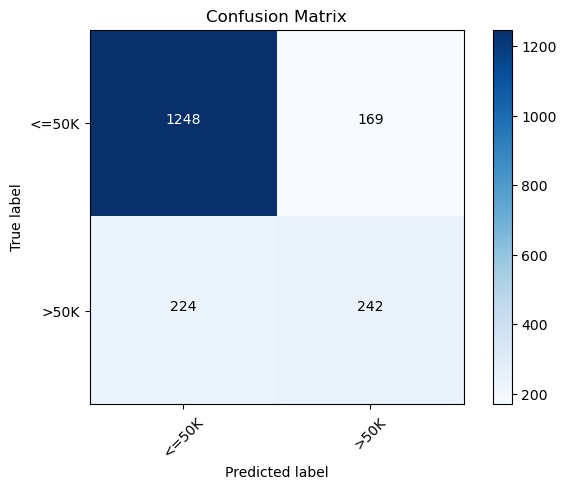

In [61]:
class_names = ['<=50K', '>50K']  # Adjust based on your class names
plot_confusion_matrix(knncm, classes=class_names, title='Confusion Matrix')
plt.show()


part b ii.	Next, experiment with different values of K (say from 5 to 100) and the weight parameter (i.e., with or without distance weighting) to see if you can improve accuracy of the KNN classifier. Show the results in a single plot comparing distance and uniform weighting schemes across the different values of K. Use the best values of these parameter (K and weighting scheme) to train a new KNN classifier and report the accuracy of this classifier on the training and test sets.

In [62]:
distance = []
for K in range(5, 105, 5):
    knnclfD = neighbors.KNeighborsClassifier(K, weights='distance')
    knnclfD.fit(adult_train_norm,adult_target_train)
    distance.append(knnclfD.score(adult_test_norm, adult_target_test))
print(distance)

[0.7732342007434945, 0.7912904938927243, 0.7928836962294211, 0.7939458311205523, 0.7960701009028146, 0.8035050451407328, 0.8040361125862985, 0.804567180031864, 0.8050982474774296, 0.8050982474774296, 0.804567180031864, 0.8056293149229952, 0.804567180031864, 0.8050982474774296, 0.8050982474774296, 0.8050982474774296, 0.8050982474774296, 0.8077535847052576, 0.8082846521508231, 0.8082846521508231]


In [63]:
uniform = []
for K in range(5, 105, 5):
    knnclfU = neighbors.KNeighborsClassifier(K, weights='uniform')
    knnclfU.fit(adult_train_norm,adult_target_train)
    uniform.append(knnclfU.score(adult_test_norm, adult_target_test))
print(uniform)

[0.7785448751991503, 0.7997875730217737, 0.8008497079129049, 0.8040361125862985, 0.8098778544875199, 0.8109399893786511, 0.8114710568242167, 0.807222517259692, 0.8109399893786511, 0.8098778544875199, 0.8120021242697822, 0.8056293149229952, 0.804567180031864, 0.8056293149229952, 0.8040361125862985, 0.8040361125862985, 0.8056293149229952, 0.8093467870419543, 0.8061603823685608, 0.8098778544875199]


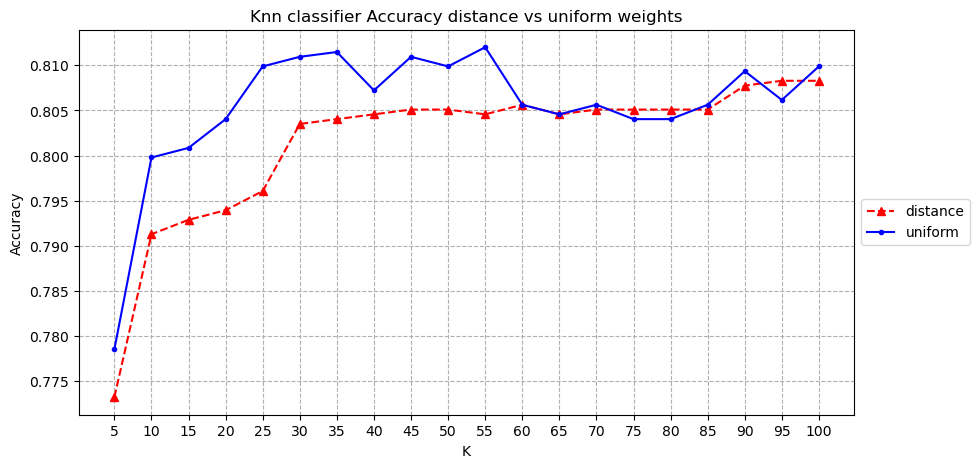

In [64]:
Ks=list(range(5, 105, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, distance, 'r^--', label='distance')
plt.plot(Ks, uniform, 'b.-', label='uniform')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy distance vs uniform weights')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

K = 55

In [65]:
K = 55
knnclfB = neighbors.KNeighborsClassifier(K, weights='uniform')
knnclfB.fit(adult_train_norm,adult_target_train)

KNeighborsClassifier(n_neighbors=55)

In [66]:
print(knnclfB.score(adult_train_norm, adult_target_train))

0.8173728250763713


In [67]:
print(knnclfB.score(adult_test_norm, adult_target_test))

0.8120021242697822


iii.	Next, using only "uniform" weights, compare the accuracy of the KNN classifier across the different values of K on the training and the test data. You should show the results in a single figure with two line plots for the test and training accuracy values (y-axis) and with values of K in the x-axis. What range of values of K represent overfitting? Briefly explain.

In [68]:

uniformTest = uniform
print(uniformTest)

[0.7785448751991503, 0.7997875730217737, 0.8008497079129049, 0.8040361125862985, 0.8098778544875199, 0.8109399893786511, 0.8114710568242167, 0.807222517259692, 0.8109399893786511, 0.8098778544875199, 0.8120021242697822, 0.8056293149229952, 0.804567180031864, 0.8056293149229952, 0.8040361125862985, 0.8040361125862985, 0.8056293149229952, 0.8093467870419543, 0.8061603823685608, 0.8098778544875199]


In [69]:
uniformTrain = []
for K in range(5, 105, 5):
    knnclfUT = neighbors.KNeighborsClassifier(K, weights='uniform')
    knnclfUT.fit(adult_train_norm,adult_target_train)
    uniformTrain.append(knnclfUT.score(adult_train_norm, adult_target_train))
print(uniformTrain)

[0.8537654402975162, 0.8426085801567273, 0.8370301500863329, 0.8315845397795192, 0.8254748306548014, 0.8237481737282507, 0.8248107318368973, 0.8221543365652809, 0.8177712843671139, 0.8196307610572453, 0.8173728250763713, 0.8189666622393412, 0.8165759064948864, 0.819099482002922, 0.8201620401115686, 0.8194979412936645, 0.8187010227121796, 0.8187010227121796, 0.8189666622393412, 0.8177712843671139]


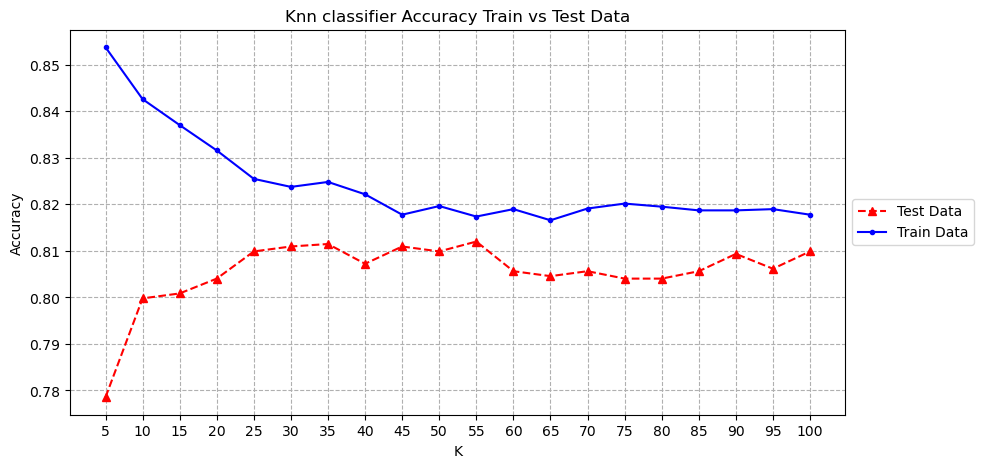

In [70]:
Ks=list(range(5, 105, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, uniformTest, 'r^--', label='Test Data')
plt.plot(Ks, uniformTrain, 'b.-', label='Train Data')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy Train vs Test Data')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The range of values are netween < 25 because of they test and accuracy points are off and >25 because they are closer from test and trainingpoints

2C 	[10 pts] Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores of the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off? Next, create another decision tree model (trained on the non-normalized training data) using "gini" index as the selection criteria, min_samples_split=10, and max_depth=4. Show the accuracy results for both the training and test sets. For this model generate a visualization of tree embedded in the Jupyter Notebook.

In [71]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.tree import DecisionTreeClassifier


In [73]:
from sklearn import tree

treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(adult_train, adult_target_train)
treepreds_test = treeclf.predict(adult_test)


In [74]:
treecm = confusion_matrix(adult_target_test, treepreds_test)
print(treecm)

[[1198  219]
 [ 255  211]]


In [75]:
print(classification_report(adult_target_test, treepreds_test))

              precision    recall  f1-score   support

       <=50K       0.82      0.85      0.83      1417
        >50K       0.49      0.45      0.47       466

    accuracy                           0.75      1883
   macro avg       0.66      0.65      0.65      1883
weighted avg       0.74      0.75      0.74      1883



In [76]:
print(treeclf.score(adult_test, adult_target_test))

0.7482740308019118


In [77]:

print(treeclf.score(adult_train, adult_target_train))

0.9432859609509895


In [78]:
treeclf2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10, max_depth=4)
treeclf2 = treeclf2.fit(adult_train, adult_target_train)

In [79]:
print(treeclf2.score(adult_test, adult_target_test))

0.8130642591609134


In [80]:

print(treeclf2.score(adult_train, adult_target_train))

0.817638464603533


In [87]:
tree = export_graphviz(treeclf2, out_file=None, feature_names=adult_train.columns, class_names=['No','Yes'])
graph = Source(tree)
display(SVG(graph.pipe(format='svg')))


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

d 10 pts] Use scikit-learn to build classifiers using Naive Bayes (Gaussian) and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the 80% training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this cross-validation accuracy to the model accuracy on the training data as a whole. Finally, run your model on the set-aside 20% test data.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.model_selection import cross_val_score


nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(adult_train, adult_target_train)
cv_scores_nb_train = cross_val_score(nbclf, adult_train, adult_target_train, cv=10)
print("Overall Average Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_nb_train.mean(), cv_scores_nb_train.std() * 2))

Overall Average Accuracy: 0.72 (+/- 0.03)


In [ ]:

print("Accuracy on Training: ",  nbclf.score(adult_train, adult_target_train))

Accuracy on Training:  0.7218754150617612


In [ ]:

print("Accuracy on Test: ", nbclf.score(adult_test, adult_target_test))

Accuracy on Test:  0.7110993096123208


In [ ]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(adult_train, adult_target_train)
cv_scores_ld_train = cross_val_score(ldclf, adult_train, adult_target_train, cv=10)
print("Overall Average Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_ld_train.mean(), cv_scores_ld_train.std() * 2))


Overall Average Accuracy: 0.81 (+/- 0.02)


In [ ]:
print("Accuracy on Training: ",  ldclf.score(adult_train, adult_target_train))

Accuracy on Training:  0.8115287554788152


In [ ]:
print("Accuracy on Test: ", ldclf.score(adult_test, adult_target_test))

Accuracy on Test:  0.7992565055762082
